In [1]:
import numpy as np
import pandas as pd
import re
import torch
import torchvision
import torch.nn as nn
from glob import glob
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import time
import seaborn as sns

In [2]:
import plotly.io as pio

pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
file_paths = glob("/Users/danielbeltsazar/DS-ML-DL Mini Projects/Weather Classification/Multi-class Weather Dataset/*/*")

In [5]:
labels = list()
for path in file_paths:
    file_name = path[path.rfind("/")+1:]
    labels.append(file_name[:re.search(r"\d", file_name).start()])

In [6]:
df = pd.DataFrame({'path': file_paths, 'class': labels})

In [7]:
df.head()

,path,class
0,/Users/danielbeltsazar/DS-ML-DL Mini Projects/...,cloudy
1,/Users/danielbeltsazar/DS-ML-DL Mini Projects/...,cloudy
2,/Users/danielbeltsazar/DS-ML-DL Mini Projects/...,cloudy
3,/Users/danielbeltsazar/DS-ML-DL Mini Projects/...,cloudy
4,/Users/danielbeltsazar/DS-ML-DL Mini Projects/...,cloudy


In [8]:
def label_column(df):
    classes = list(df['class'].unique())
    class_to_num = dict(zip(classes, range(len(classes))))
    df['label'] = df['class'].apply(lambda x: class_to_num[x])

In [9]:
label_column(df)

In [10]:
df.head()

,path,class,label
0,/Users/danielbeltsazar/DS-ML-DL Mini Projects/...,cloudy,0
1,/Users/danielbeltsazar/DS-ML-DL Mini Projects/...,cloudy,0
2,/Users/danielbeltsazar/DS-ML-DL Mini Projects/...,cloudy,0
3,/Users/danielbeltsazar/DS-ML-DL Mini Projects/...,cloudy,0
4,/Users/danielbeltsazar/DS-ML-DL Mini Projects/...,cloudy,0


In [11]:
df_new = df.groupby(['class'])[['label']].count()
df_new = df_new.reset_index()
df_new = df_new.rename(columns={'label':'Count','class':'Class'})
df_new.head()

,Class,Count
0,cloudy,300
1,rain,215
2,shine,253
3,sunrise,357


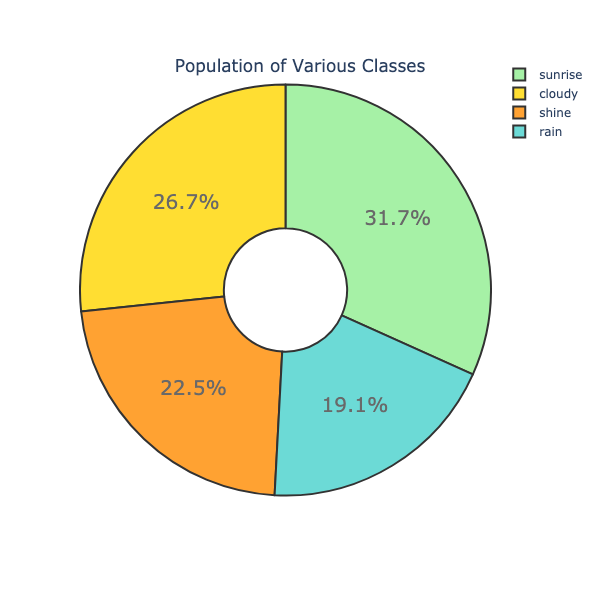

In [15]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = px.pie(df_new,values='Count',names='Class', hole=.3, width=600, height=600,opacity=.80)
fig.update_traces(hoverinfo='label+percent',textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide', title={'text': 'Population of Various Classes','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show(renderer='png')

In [13]:
# In github the plot can't be seen, so i will put it here


In [14]:
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)
test, val = train_test_split(test, test_size=0.5, shuffle=True, random_state=42)